In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import xarray as xr

import ecephys_analyses as ea

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
xr.set_options(keep_attrs=True)

In [4]:
def get_isi(spws):
    return (spws.start_time[1:].values - spws.end_time[:-1].values) / pd.to_timedelta(1, 's')

In [9]:
subjects = ['Segundo', 'Valentino', 'Doppio', 'Alessandro', 'Allan']

subj_dfs = list()

for subject in subjects:
    early_hyp, early_spws = ea.load_early_deprivation(subject)
    late_hyp, late_spws = ea.load_late_deprivation(subject)
    
    early_isi = get_isi(early_spws)
    late_isi = get_isi(late_spws)
    
    early_isi_df = pd.DataFrame({'isi': early_isi, 'condition': 'early'})
    late_isi_df = pd.DataFrame({'isi': late_isi, 'condition': 'late'})

    subj_dfs.append(pd.concat([early_isi_df, late_isi_df]).assign(subject=subject))

all_subjects_df = pd.concat(subj_dfs, ignore_index=True)

In [10]:
def plot_subject(subject, all_subjects_df, col='isi', log_scale=True):
    df = all_subjects_df[all_subjects_df['subject'] == subject]
    thresh = df[col].mean() + df[col].std() * 3
    df = df[df[col] < thresh]
    fig, axes = plt.subplots(1, 4, figsize=(32, 6))
    fig.suptitle(subject)
    sns.histplot(df, x=col, hue='condition', log_scale=log_scale, ax=axes[0])
    axes[0].set(title='Unnormalized')
    sns.histplot(df, x=col, hue='condition', stat='probability', common_norm=False, log_scale=log_scale, ax=axes[1])
    axes[1].set(title='Normalized probability')
    sns.histplot(df, x=col, hue='condition', stat='density', common_norm=False, log_scale=log_scale, ax=axes[2])
    axes[2].set(title='Normalized density')
    
    df[col] = np.log10(df[col])
    sns.ecdfplot(df, x=col, hue='condition', ax=axes[3])
    axes[3].set(title='Empirical CDF')

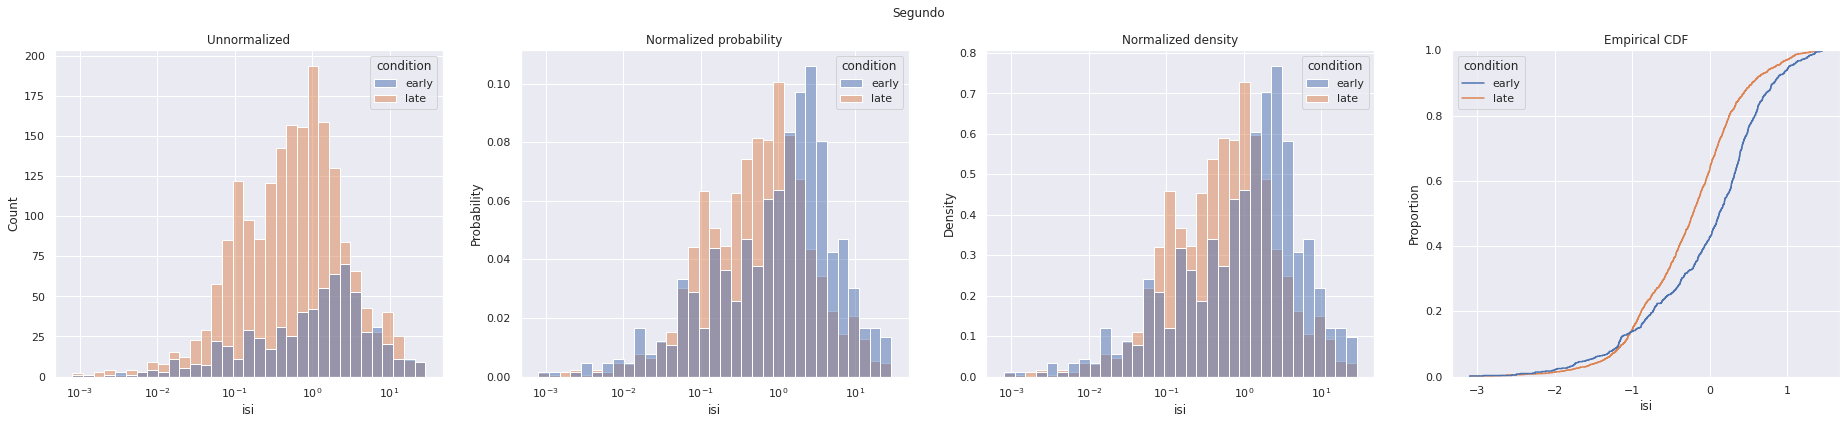

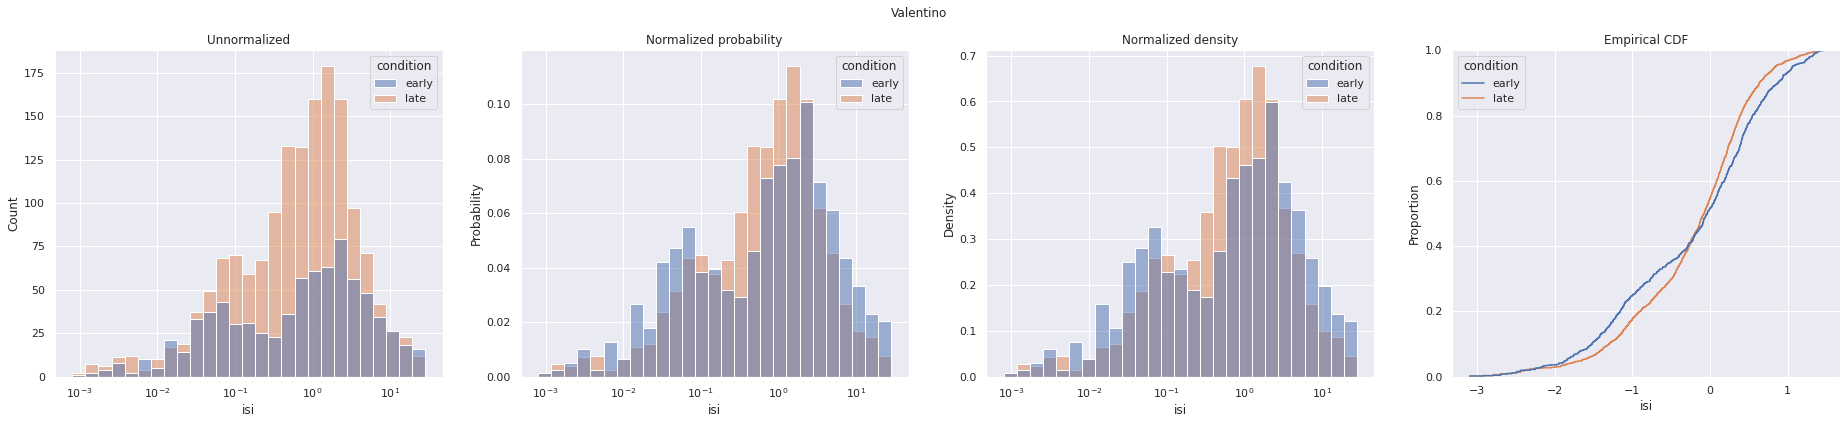

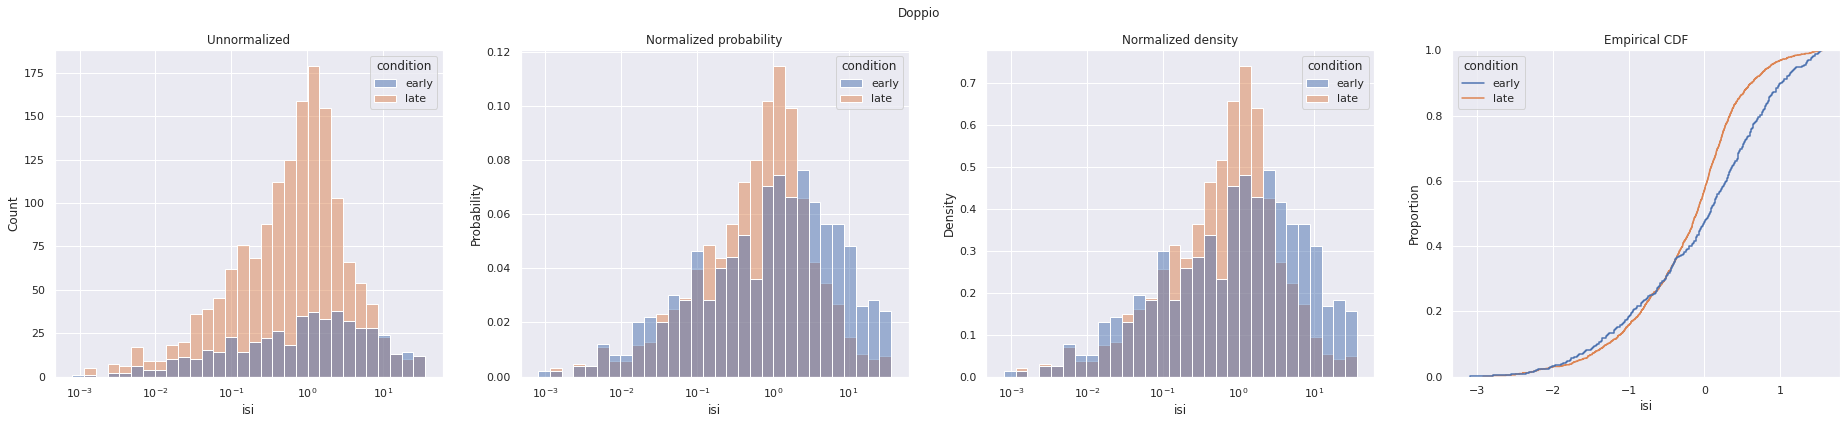

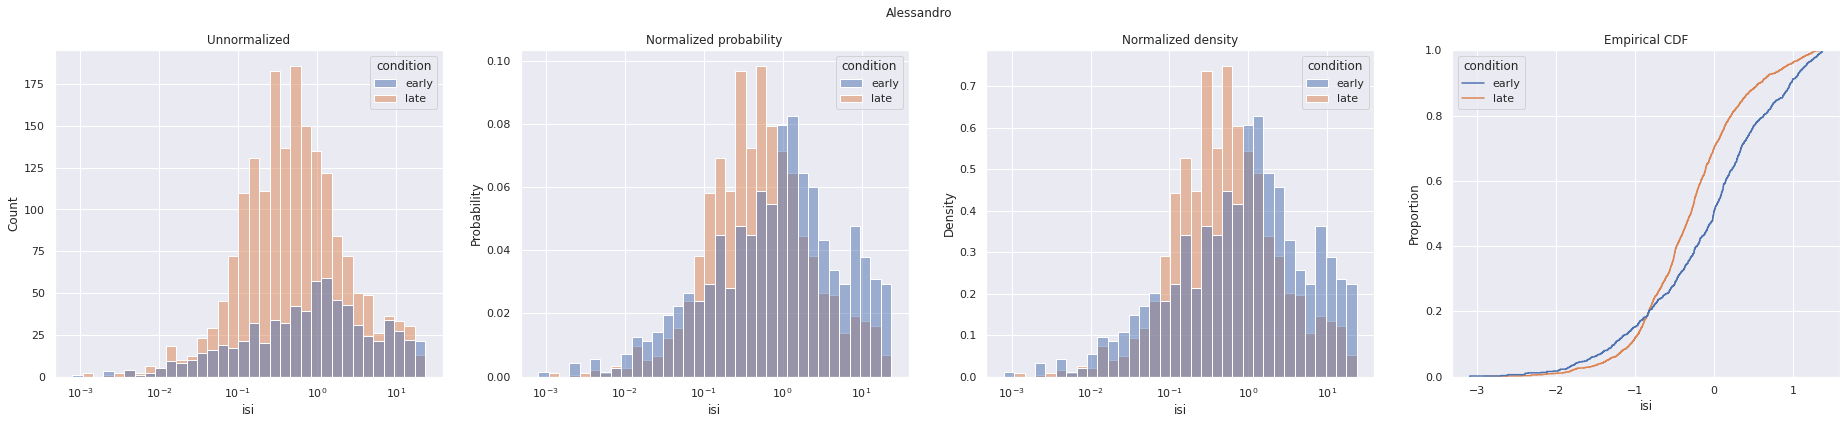

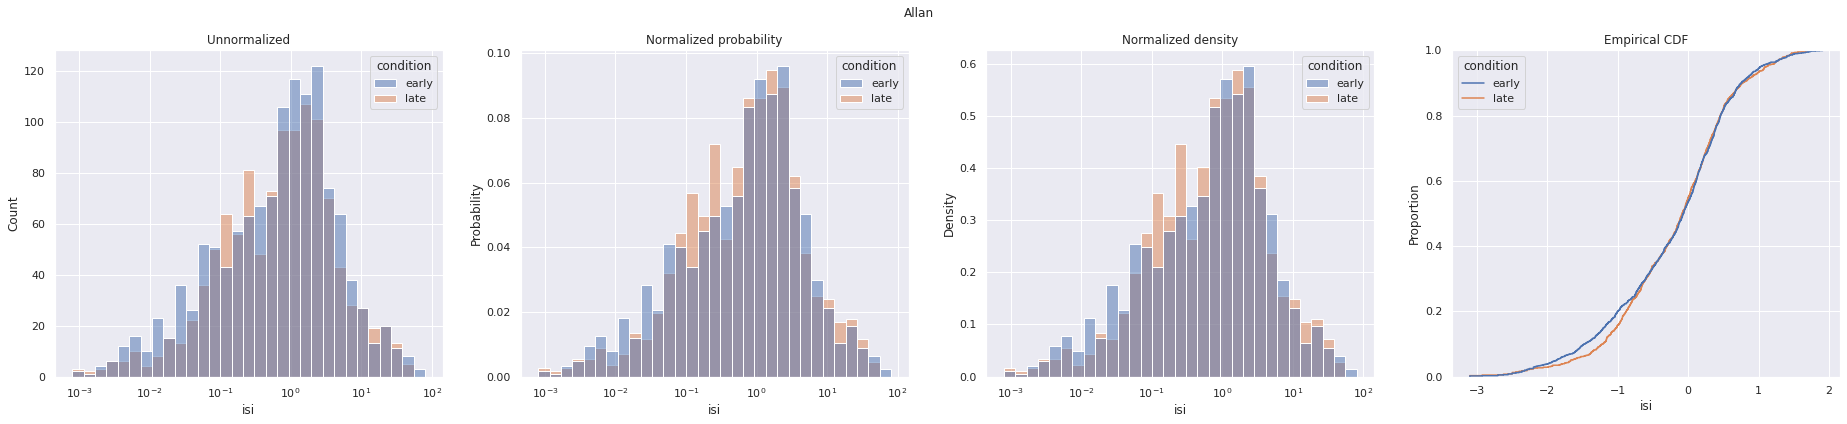

In [11]:
for subject in subjects:
    plot_subject(subject, all_subjects_df)